In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import geopandas as gpd
import humanize as h

file_comuni ='./comuni_clean.csv'  #file già puliti
file_rip ='./ripartizioni_clean.csv'
file_prov ='./province_clean.csv'
file_reg ='./regioni_clean.csv'
comuni_clean =pd.read_csv(file_comuni)
ripartizioni_clean  =pd.read_csv(file_rip)
province_clean =pd.read_csv(file_prov)
regioni_clean =pd.read_csv(file_reg)
print(comuni_clean)
print(ripartizioni_clean)
print(province_clean)
print(regioni_clean)


      Unnamed: 0    Denominazione   Regione Sigla automobilistica  \
0              0            Aglie  Piemonte                    TO   
1              1          Airasca  Piemonte                    TO   
2              2     Ala di Stura  Piemonte                    TO   
3              3  Albiano d'Ivrea  Piemonte                    TO   
4              4           Almese  Piemonte                    TO   
...          ...              ...       ...                   ...   
7910        7914       Villaputzu  Sardegna                    SU   
7911        7915       Villasalto  Sardegna                    SU   
7912        7916      Villasimius  Sardegna                    SU   
7913        7917         Villasor  Sardegna                    SU   
7914        7918    Villaspeciosa  Sardegna                    SU   

      Popolazione2011  
0              2644.0  
1              3819.0  
2               462.0  
3              1791.0  
4              6303.0  
...               ...  
791

In [2]:
#Regione = str(input("Inserisci una specifica Regione : "))
#dati_regione = regioni_clean[regioni_clean['RegionName'] == Regione]
#print(dati_regione[['RegionName','HospitalizedPatients', 'Recovered', 'Deaths', 'CurrentPositiveCases']]) 
# tutte le info selezionate della Regione scelta, nel mio caso Emilia-Romagna

In [3]:
# unire regioni e comuni, al posto della def ho provato una try
#Regione = input("Inserisci una Regione: ")

#try:
    # Non valori nulli
    #comuni_regione = comuni_clean.loc[comuni_clean['Regione'].str.contains(Regione, case=False, na = False), 'Denominazione'].drop_duplicates().tolist()
    
    #if comuni_regione:
        #print(f"I comuni della regione '{Regione}' sono: {comuni_regione}")
    #else:
        #print(f"Nessun comune trovato per la regione '{Regione}'.")
#except KeyError:
    #print("Dati non corretti")

In [3]:
totali_positivi = regioni_clean.tail(21)["TotalPositiveCases"].sum()
print("Totali Casi Positivi durante l'ultimo giorno nelle regioni", totali_positivi) 

Totali Casi Positivi durante l'ultimo giorno nelle regioni 1728878


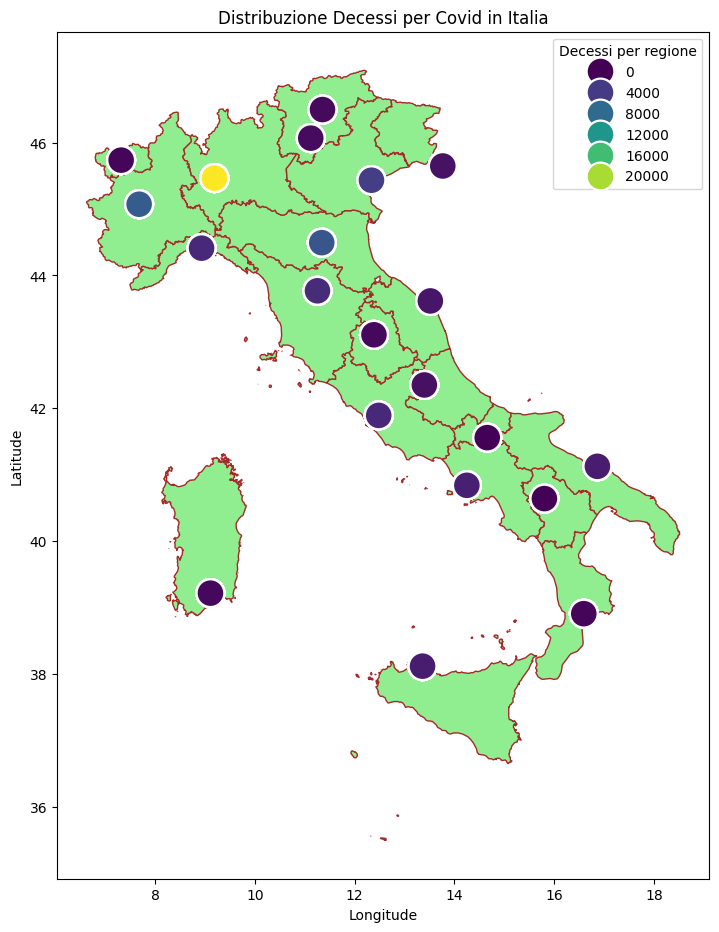

In [5]:

# Mappa Italia
map = "./italy-with-regions_1458.geojson"
italy = gpd.read_file(map)


italy.plot(color = 'lightgreen', edgecolor = 'brown', figsize = (11, 11)) #confini regioni marroni, sfondo verde chiaro

#  heat maps
sns.scatterplot(data = regioni_clean, x ='Longitude', y ='Latitude', hue ='Deaths', palette='viridis', s = 400)
             
#s = size dei markers           #hue = colori in base ai morti
import matplotlib.colors as mcolors
plt.title('Distribuzione Decessi per Covid in Italia')
plt.legend(title = 'Decessi per regione', loc = 'best')
plt.savefig('Distribuzione Decessi Covid in Italia.png')
plt.show()


regioni_somma_contagi                       RegionName  TotalPositiveCases
0                        Abruzzo               30274
1                     Basilicata                8940
2                       Calabria               18537
3                       Campania              165293
4                 Emilia-Romagna              133761
5          Friuli-Venezia Giulia               35467
6                          Lazio              130255
7                        Liguria               53779
8                      Lombardia              429109
9                         Marche               32393
10                        Molise                5286
11                      Piemonte              177788
12                        Puglia               64341
13                      Sardegna               24186
14                       Sicilia               71489
15                       Toscana              108397
16  Trentino-Alto Adige/Sudtirol               25361
17                      

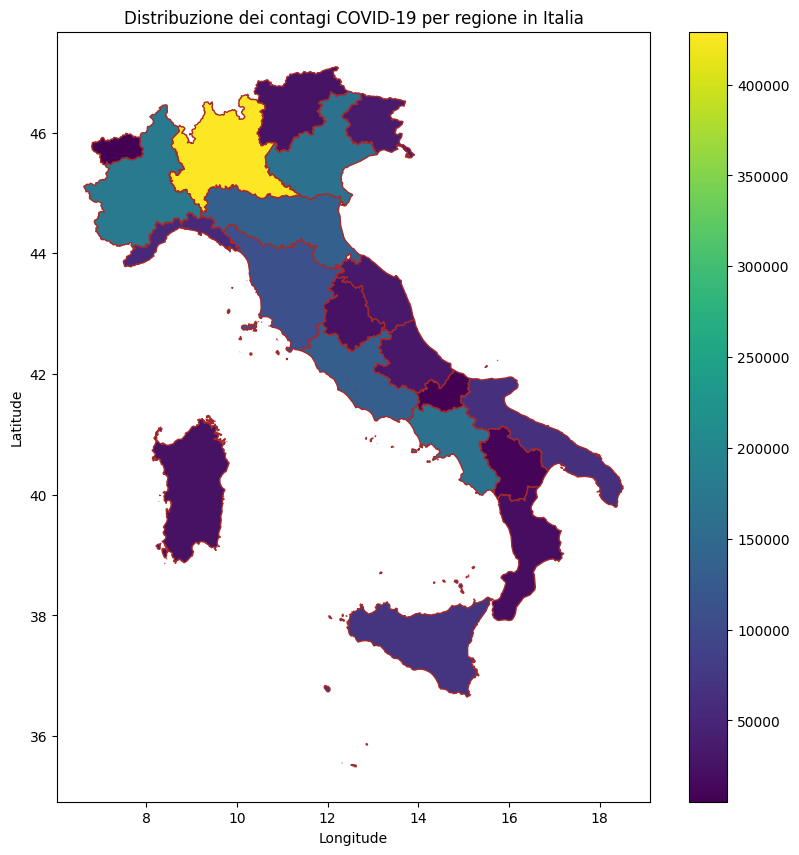

In [6]:
#CONTAGI Massimi
import matplotlib.pyplot as plt
import geopandas as gpd

regioni_somma_contagi = regioni_clean.groupby('RegionName')['TotalPositiveCases'].max().reset_index()
print("regioni_somma_contagi", regioni_somma_contagi)
italy_with_cases = italy.merge(regioni_somma_contagi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='TotalPositiveCases', cmap='viridis', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione dei contagi COVID-19 per regione in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Italia1.png')
plt.show()

regioni_decessi                       RegionName  Deaths
0                        Abruzzo     980
1                     Basilicata     175
2                       Calabria     343
3                       Campania    1990
4                 Emilia-Romagna    6162
5          Friuli-Venezia Giulia    1035
6                          Lazio    2622
7                        Liguria    2521
8                      Lombardia   23024
9                         Marche    1327
10                        Molise     135
11                      Piemonte    6623
12                        Puglia    1712
13                      Sardegna     531
14                       Sicilia    1759
15                       Toscana    2867
16  Trentino-Alto Adige/Sudtirol     691
17                        Umbria     460
18                 Valle d'Aosta     333
19                        Veneto    4210


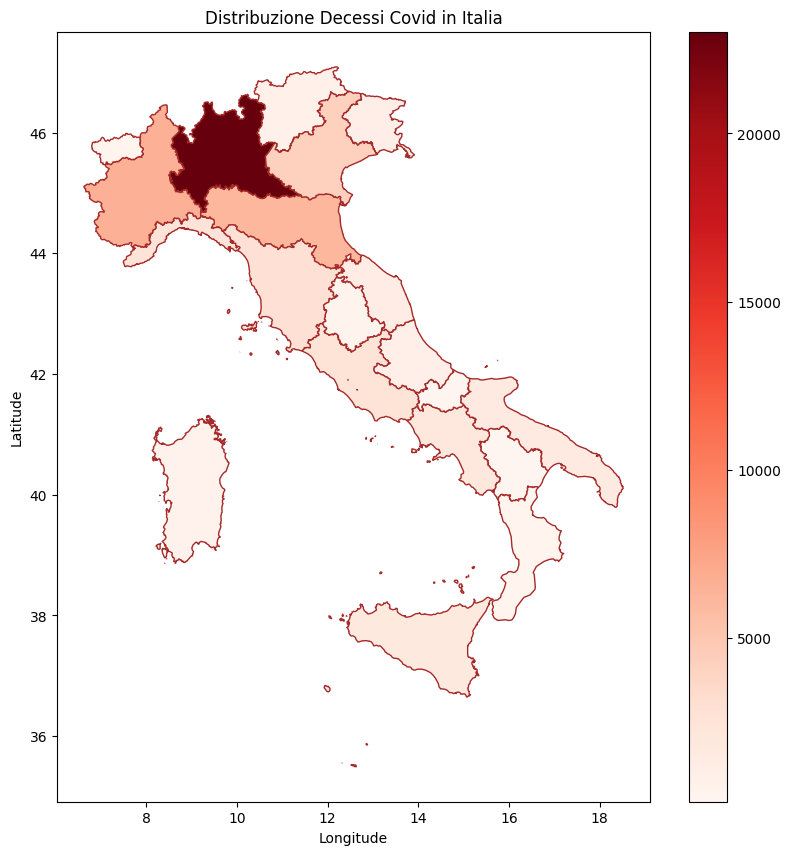

In [7]:
# Decessi massimi
import matplotlib.pyplot as plt
import geopandas as gpd
regioni_decessi = regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()
print("regioni_decessi", regioni_decessi)
italy_with_cases = italy.merge(regioni_decessi, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Deaths', cmap='Reds', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione Decessi Covid in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Italia2.png')
plt.show()

regioni_guariti                       RegionName  Recovered
0                        Abruzzo      12206
1                     Basilicata       2397
2                       Calabria       7533
3                       Campania      62060
4                 Emilia-Romagna      59432
5          Friuli-Venezia Giulia      19401
6                          Lazio      33422
7                        Liguria      40842
8                      Lombardia     289706
9                         Marche      11008
10                        Molise       2438
11                      Piemonte     105127
12                        Puglia      16795
13                      Sardegna       8695
14                       Sicilia      29984
15                       Toscana      76331
16  Trentino-Alto Adige/Sudtirol      13995
17                        Umbria      18619
18                 Valle d'Aosta       5406
19                        Veneto      84235


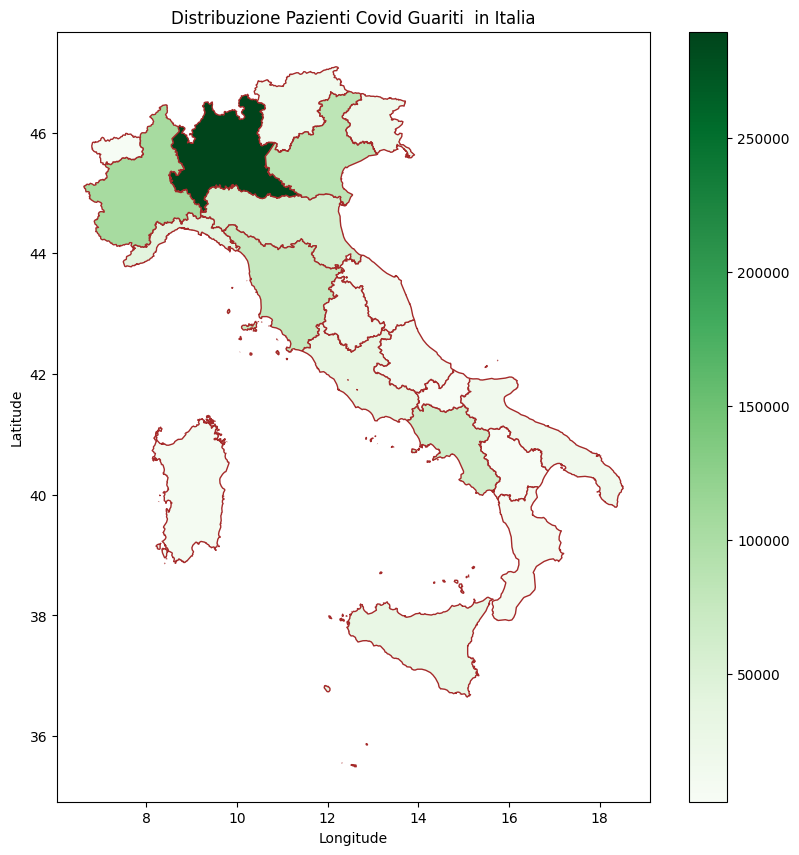

In [8]:
# Pazienti guariti massimi
import matplotlib.pyplot as plt
import geopandas as gpd
regioni_guariti = regioni_clean.groupby('RegionName')['Recovered'].max().reset_index()
print("regioni_guariti", regioni_guariti)
italy_with_cases = italy.merge(regioni_guariti, left_on='name', right_on='RegionName', how='left')
italy_with_cases.plot(column='Recovered', cmap='Greens', edgecolor='brown', legend=True, figsize=(10, 10))
plt.title('Distribuzione Pazienti Covid Guariti  in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Italia3.png')
plt.show()

Le tre regioni con il maggior tasso di pazienti guariti sono:
RegionName
Lombardia    289706
Piemonte     105127
Veneto        84235
Name: Recovered, dtype: int64


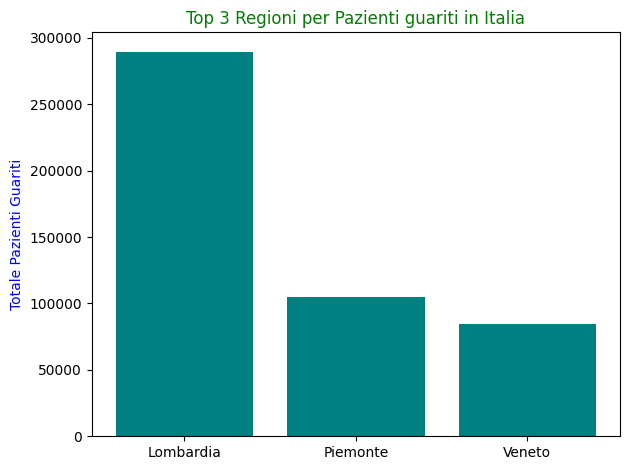

In [9]:
#top tre regioni per pazienti guariti

total_Recovered_by_region = regioni_clean.groupby('RegionName')['Recovered'].max()
sorted_regions = total_Recovered_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti guariti sono:")
print(top_3_regions)
region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values

plt.bar(region_names, total_hospitalized_counts, color='#008080')

plt.ylabel('Totale Pazienti Guariti', color = "b")
plt.title('Top 3 Regioni per Pazienti guariti in Italia', color = "g" )

plt.savefig('Top 3 Regioni Guariti.png', dpi = 100)
plt.tight_layout()
plt.show()

Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono: RegionName
Lombardia         1121690
Piemonte           446772
Emilia-Romagna     328932
Name: TotalHospitalizedPatients, dtype: int64


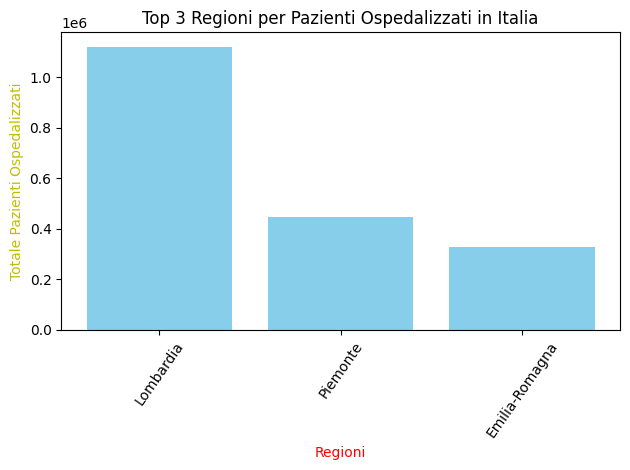

In [10]:
#3 Regioni con il maggior numero di Ospedalizzazioni

totale_osped_regione = regioni_clean.groupby('RegionName')['TotalHospitalizedPatients'].sum() #raggruppo e somma
classi_regioni = totale_osped_regione.sort_values(ascending = False)
top_tre_regioni = classi_regioni.head(3) #Le prime tre Regioni
print("Le tre regioni con il maggior tasso di pazienti ospedalizzati totali sono:", top_tre_regioni)


import matplotlib.pyplot as plt
region_names = top_tre_regioni.index #ascisse
total_hospitalized_counts = top_tre_regioni.values
plt.bar(region_names, total_hospitalized_counts, color ='skyblue') #grafico a barre 
plt.xlabel('Regioni', color = 'r') 
plt.ylabel('Totale Pazienti Ospedalizzati', color = 'y')
plt.title('Top 3 Regioni per Pazienti Ospedalizzati in Italia')
plt.savefig('Top 3 Regioni per Pazienti Ospedalizzati in Italia.png')
plt.xticks(rotation = 55)
plt.tight_layout()
plt.show()


Le dieci province con il maggior tasso di pazienti positivi sono:
ProvinceName
Milano                   158717
Napoli                   102702
Roma                      96985
Torino                    94349
Varese                    45944
Monza e della Brianza     44603
Brescia                   36010
Treviso                   31952
Genova                    31864
Padova                    31073
Name: TotalPositiveCases, dtype: int64


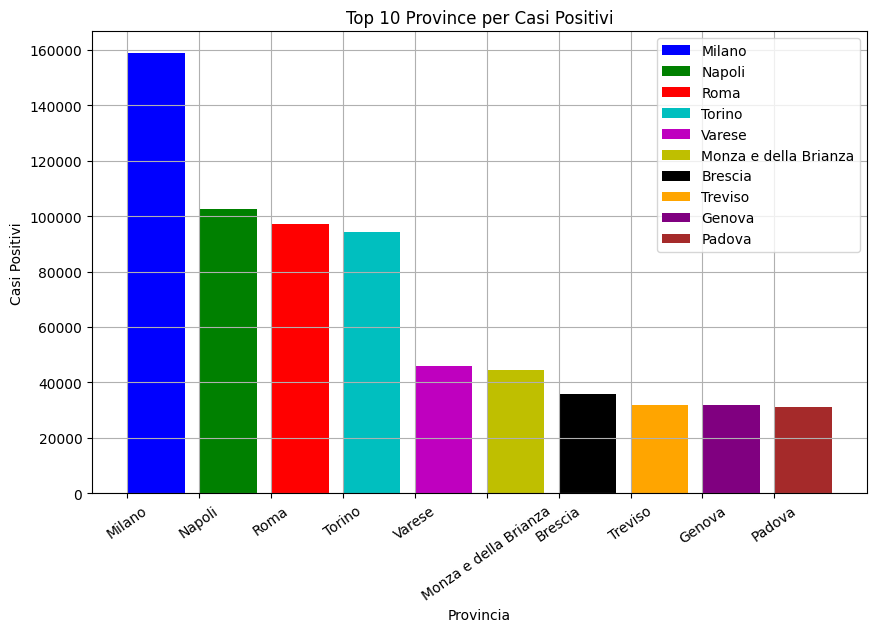

In [11]:
# top 10 province per casi positivi

Total_Positive_Cases_province = province_clean.groupby('ProvinceName')['TotalPositiveCases'].max()
sorted_province = Total_Positive_Cases_province.sort_values(ascending=False)
top_10_province = sorted_province.head(10)
print("Le dieci province con il maggior tasso di pazienti positivi sono:")
print(top_10_province)
province = top_10_province.index
total_cases = top_10_province.values

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown'] #ogni colore, ogni provincia
for i in range(len(province)):
    plt.bar(province[i], total_cases[i], color=colors[i], label=province[i], align='edge')
plt.title("Top 10 Province per Casi Positivi")
plt.xlabel("Provincia")
plt.ylabel("Casi Positivi")
plt.xticks(rotation = 35)
plt.savefig('Top 10 Province.png', dpi = 100)
plt.legend(loc  = "best")
plt.grid(True)
plt.legend()
plt.show()





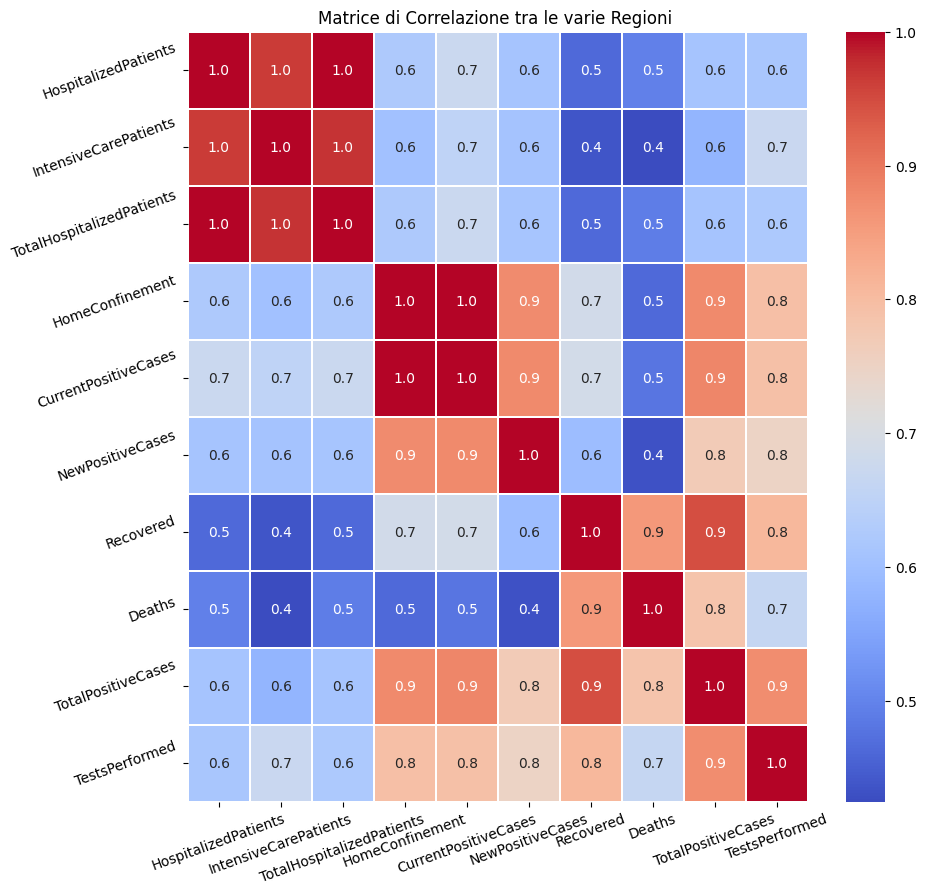

In [14]:
# CORRELAZIONE

regioni_corr = regioni_clean.select_dtypes(include=['float64', 'int64'])
corr_matrix = regioni_corr.corr()  #mettiamo in correlazione le regioni includendo float ed int
corr_matrix = corr_matrix.iloc[5:, 5:] #solo le righe e colonne che ci servono, no le prime 4 colonne
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt ='.1f', linewidths= .2) 
#1 decimale float, invece annot mostra i valori nelle celle


plt.title('Matrice di Correlazione tra le varie Regioni ')
plt.savefig('Matrice di Correlazione tra le varie Regioni.png')
plt.xticks(rotation = 20)
plt.yticks(rotation = 20)
plt.show()

                              count          mean          std  min      25%  \
RegionName                                                                     
Abruzzo                       287.0    412.188153   205.593205  0.0    338.0   
Basilicata                    287.0     33.801394    31.523090  0.0     25.0   
Calabria                      287.0     97.013937    58.899165  0.0     88.5   
Campania                      287.0    470.588850   351.108681  0.0    372.5   
Emilia-Romagna                287.0   3758.376307  1454.794924  0.0   3721.0   
Friuli-Venezia Giulia         287.0    325.515679   173.187635  0.0    304.5   
Lazio                         287.0    811.693380   532.126717  0.0    536.0   
Liguria                       287.0   1357.435540   596.388034  0.0   1237.5   
Lombardia                     287.0  14552.163763  5457.487022  6.0  14500.0   
Marche                        287.0    868.832753   318.123794  0.0    939.5   
Molise                        287.0     

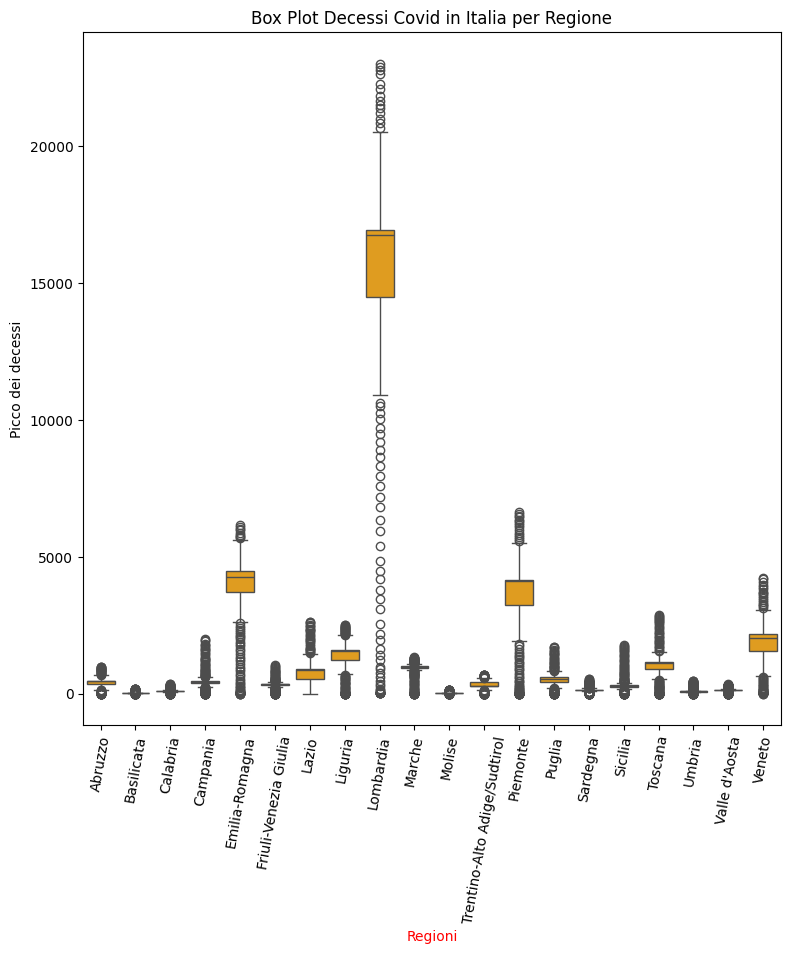

In [15]:
#BOXPLOT 
import matplotlib.pyplot as plt
import seaborn as sns

regioni_somma_decessi = regioni_clean.groupby('RegionName')['Deaths']
print(regioni_somma_decessi.describe())
# Plot del boxplot
plt.figure(figsize=(9, 9))
sns.boxplot(data=regioni_clean, x='RegionName', y='Deaths', color = 'orange')
plt.xlabel('Regioni', color = 'r')
plt.ylabel('Picco dei decessi')
plt.title('Box Plot Decessi Covid in Italia per Regione')
plt.xticks(rotation = 80) 
#plt.savefig('Boxplot Decessi.png', dpi = 100)
plt.show()

In [16]:
file_reg='./regioni_clean.csv'
regioni_clean=pd.read_csv(file_reg)
regioni_clean = regioni_clean.dropna(how = "all").drop_duplicates()

regioni_clean['Date'] = pd.to_datetime(regioni_clean['Date'], format='%d-%m-%y')  #modifico il formato Date
regioni_clean.set_index('Date', inplace=True) 
#modifica il DataFrame regioni_pulite direttamente anziché restituire una copia del DataFrame con l'operazione applicata.
contagi_mezzo_mese = regioni_clean.resample('SME')['TotalPositiveCases'].sum().reset_index()  #resetta l'indice del df basato su mezzo mese
print(contagi_mezzo_mese)



         Date  TotalPositiveCases
0  2020-02-15                2489
1  2020-02-29              117914
2  2020-03-15              987144
3  2020-03-31             2034411
4  2020-04-15             2794442
5  2020-04-30             3228955
6  2020-05-15             3658374
7  2020-05-31             3524599
8  2020-06-15             3583074
9  2020-06-30             3629901
10 2020-07-15             3923885
11 2020-07-31             3747338
12 2020-08-15             4150607
13 2020-08-31             4183752
14 2020-09-15             4519961
15 2020-09-30             5076494
16 2020-10-15             7840153
17 2020-10-31            13498229
18 2020-11-15            20904021
19 2020-11-30            11656702


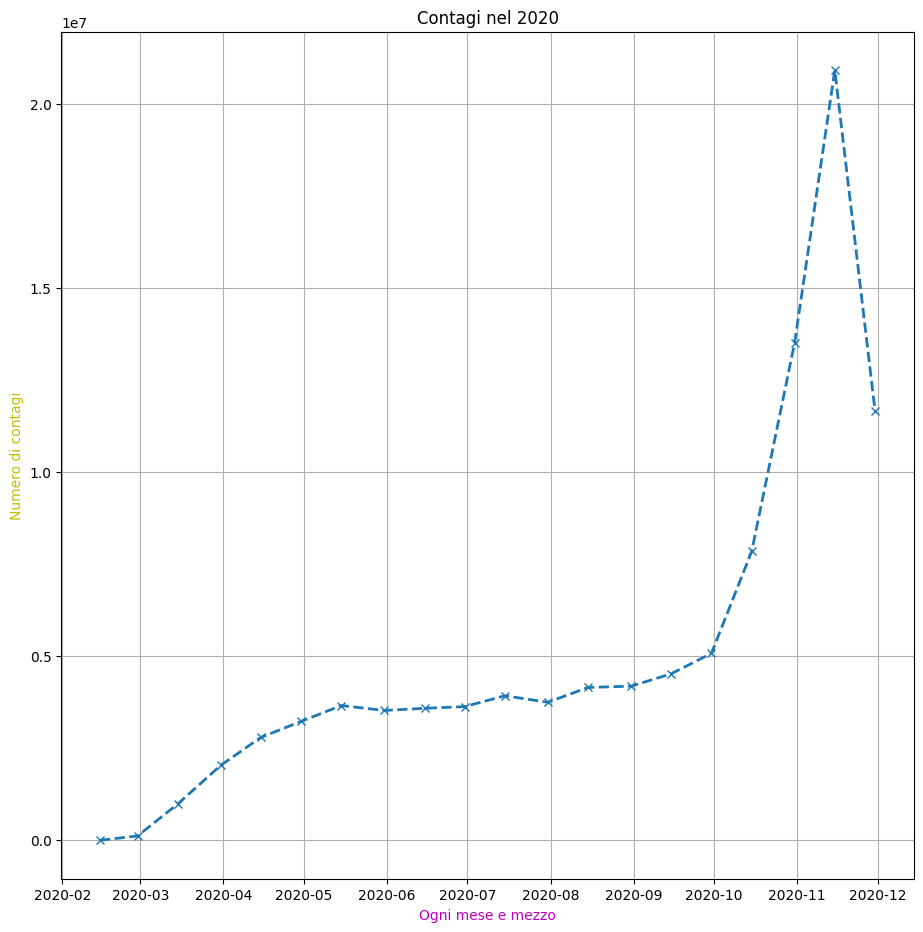

In [17]:
#contagi SEMESTRALI
plt.figure(figsize=(11, 11))
plt.plot(contagi_mezzo_mese['Date'], contagi_mezzo_mese['TotalPositiveCases'], marker ='x', linewidth = 2 ,linestyle = "--")
plt.grid(True) #griglia di sottofondo
plt.title('Contagi nel 2020')
plt.xlabel('Ogni mese e mezzo', color = "m")
plt.ylabel('Numero di contagi', color = "y")
plt.savefig('Contagi ogni mezzo mese.png', dpi = 100)
plt.show()

In [18]:
#ripartizione geografica affiancata a regione (colonne selezionate)
import pandas as pd

risultato = pd.merge(regioni_clean, ripartizioni_clean, left_on ='RegionCode', right_on ='Codice Regione', how ='inner')
colonne_interessanti = ["Ripartizione geografica" , "Regione"]
risultato_s = risultato[colonne_interessanti]
print(risultato_s)

     Ripartizione geografica         Regione
0                        Sud         Abruzzo
1                        Sud      Basilicata
2                        Sud        Calabria
3                        Sud        Campania
4                   Nord-est  Emilia-Romagna
...                      ...             ...
5448                   Isole         Sicilia
5449                  Centro         Toscana
5450                  Centro          Umbria
5451              Nord-ovest   Valle d'Aosta
5452                Nord-est          Veneto

[5453 rows x 2 columns]


          Date  NewPositiveCases  Deaths  nuovi_morti
0   2020-02-24               221       7            7
1   2020-02-25                93      10            3
2   2020-02-26                78      12            2
3   2020-02-27               250      17            5
4   2020-02-28               238      21            4
..         ...               ...     ...          ...
282 2020-12-02             20709   57045          684
283 2020-12-03             23225   58038          993
284 2020-12-04             24099   58852          814
285 2020-12-05             21052   59514          662
286 2020-12-06             18887   60078          564

[287 rows x 4 columns]


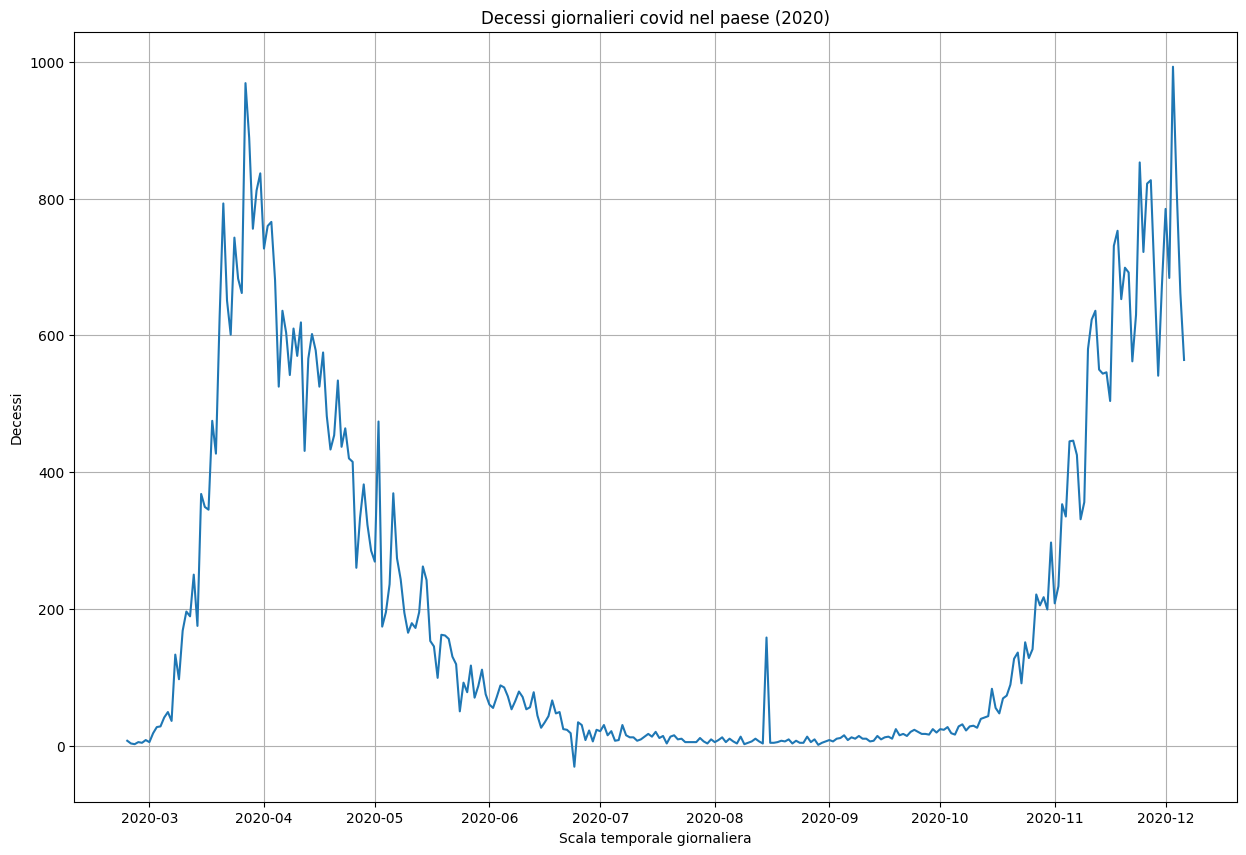

In [19]:
import matplotlib.pyplot as plt

# andamento morti giornalieri 
contagimorti_giornalieri =regioni_clean.resample('D')[['NewPositiveCases','Deaths']].sum().reset_index()
contagimorti_giornalieri['nuovi_morti']=0
for i in range(0, 287):
        if i==0:
                contagimorti_giornalieri.iloc[0,3]=contagimorti_giornalieri.iloc[0,2]
        else:
                contagimorti_giornalieri.iloc[i,3]=contagimorti_giornalieri.iloc[i,2]-contagimorti_giornalieri.iloc[(i-1),2]
    
print(contagimorti_giornalieri)
#print(contagimorti_giornalieri[['Date','TotalPositiveCases','Deaths']])
#contagimorti_giornalieri['letalita']=(contagimorti_giornalieri['Deaths']/contagimorti_giornalieri['TotalPositiveCases'])*100
#letalita=contagimorti_giornalieri['letalita'].round(decimals=3)
plt.figure(figsize=(15, 10))
plt.plot(contagimorti_giornalieri.iloc[:,0],contagimorti_giornalieri.iloc[:,3])
plt.grid(True)
plt.title('Decessi giornalieri covid nel paese (2020)')
plt.xlabel('Scala temporale giornaliera')
plt.ylabel('Decessi')
plt.savefig('Giornalieri.png', dpi = 100)
plt.show()

                      Territorio  Osservazione                    RegionName  \
0                       Piemonte           8.9                      Piemonte   
1                  Valle d'Aosta           6.3                 Valle d'Aosta   
2                        Liguria          10.6                       Liguria   
3                      Lombardia           9.0                     Lombardia   
4   Trentino-Alto Adige/Sudtirol           4.8  Trentino-Alto Adige/Sudtirol   
5                         Veneto           8.0                        Veneto   
6          Friuli-Venezia Giulia           7.8         Friuli-Venezia Giulia   
7                 Emilia-Romagna           7.6                Emilia-Romagna   
8                        Toscana           7.8                       Toscana   
9                         Umbria          10.8                        Umbria   
10                        Marche          14.6                        Marche   
11                         Lazio        

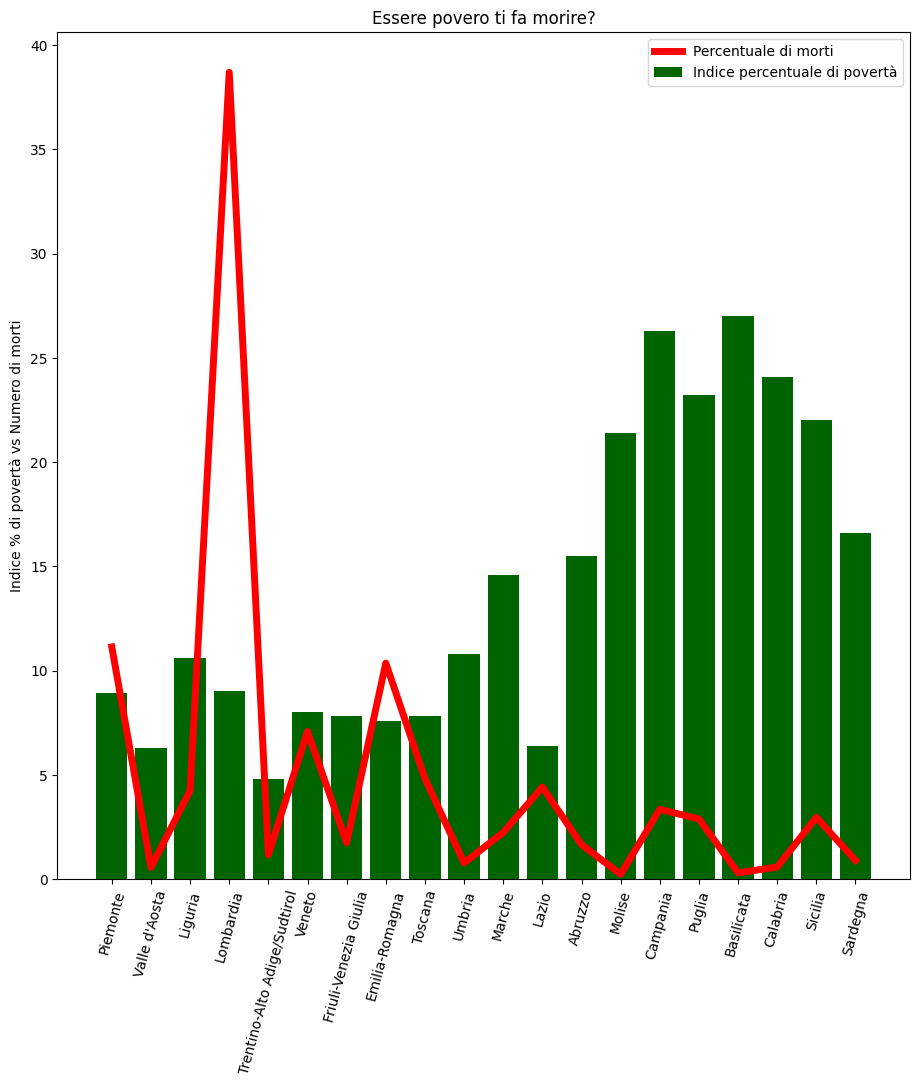

In [23]:
# RELAZIONE TRA INDICE POVERTA E DECESSI PER IL COVID

poveri = './poveri_regione_clean.csv'
poveri_regione=pd.read_csv(poveri, sep = ",")
poveri_regione=poveri_regione.drop(['Unnamed: 0'], axis=1)
regioni_raggruppate=regioni_clean.groupby('RegionName', as_index=False)['Deaths'].max()
join_poveri_covidcase = pd.merge(poveri_regione, regioni_raggruppate, left_on='Territorio', right_on='RegionName', how='inner')


print(join_poveri_covidcase)
plt.figure(figsize=(11,11))
plt.plot(join_poveri_covidcase['Territorio'],(join_poveri_covidcase['Deaths']/join_poveri_covidcase['Deaths'].sum())*100, color='red',linewidth=5, label='Percentuale di morti')
plt.bar(join_poveri_covidcase['Territorio'],join_poveri_covidcase['Osservazione'], color='darkgreen', label='Indice percentuale di povertà')
plt.xticks(rotation=75)
plt.title('Essere povero ti fa morire?')
plt.ylabel('Indice % di povertà vs Numero di morti')
plt.savefig('Povertà', dpi = 100)
plt.legend()
plt.show()




                  Regione Superficie(km^2)
0               Lombardia        23 863,10
1                   Lazio        17 231,72
2                Campania        13 670,60
3                  Veneto        18 345,37
4                 Sicilia        25 832,55
5          Emilia-Romagna        22 501,43
6                Piemonte        25 386,70
7                  Puglia        19 540,52
8                 Toscana        22 987,44
9                Calabria        15 221,61
10               Sardegna        24 099,45
11                Liguria         5 416,15
12                 Marche         9 344,29
13                Abruzzo        10 831,50
14  Friuli-Venezia Giulia         7 932,48
15    Trentino-Alto Adige        13 604,72
16                 Umbria         8 464,22
17             Basilicata        10 073,11
18                 Molise         4 460,44
19          Valle d'Aosta         3 260,85
    Unnamed: 0  Codice Regione Ripartizione geografica  \
0            0               1         

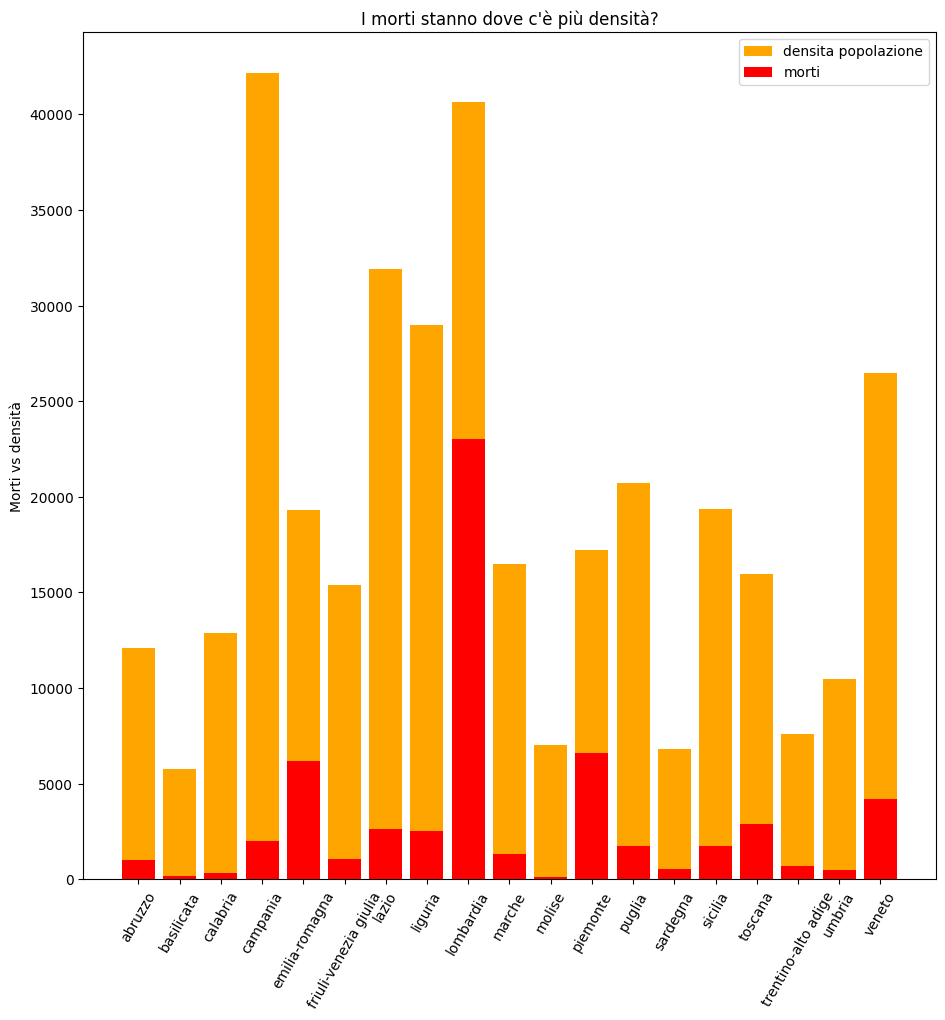

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sito Wikipedia

url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'

# Effettua una richiesta GET al sito
response = requests.get(url)
# Verifica se la richiesta è andata a buon fine (200)
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')
    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})
    # Inizializza una lista per memorizzare i dati
    data = []
    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip()  # Assumendo che la superficie sia nella quarta colonna
        data.append([regione, superficie])

# Crea un DataFrame pandas
    dataframe = pd.DataFrame(data, columns=['Regione', 'Superficie(km^2)'])
    dataframe = dataframe.drop(dataframe.index[-1])
    # Stampa il DataFrame
    print(dataframe)
else:
    print('Errore nella richiesta HTTP')

print(ripartizioni_clean, regioni_clean['RegionName'].unique(), "dataframe", dataframe)



# Densità comparata con i morti
abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum().reset_index()
abitanti_regione['Regione']= abitanti_regione['Regione'].str.lower()
abitanti_regione['Regione'] = abitanti_regione['Regione'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
dataframe['Regione']= dataframe['Regione'].str.lower()
dataframe['Superficie(km^2)'] = dataframe['Superficie(km^2)'].str.replace(',', '.').str.replace(r'\s+', '', regex=True).astype(float)
calcolo_densita= pd.merge(abitanti_regione, dataframe, left_on='Regione', right_on='Regione')
calcolo_densita['Superficie(km^2)']= calcolo_densita['Superficie(km^2)'].astype(float)
calcolo_densita['densita']= calcolo_densita['Popolazione2011']/calcolo_densita['Superficie(km^2)']
regioni_raggruppate['RegionName']=regioni_raggruppate['RegionName'].str.lower()
regioni_raggruppate['RegionName'] = regioni_raggruppate['RegionName'].replace('trentino-alto adige/sudtirol', 'trentino-alto adige')
print(regioni_raggruppate.columns)
morti_densita=pd.merge(calcolo_densita, regioni_raggruppate, left_on='Regione', right_on='RegionName')
print(morti_densita)
#grafico a barre
plt.figure(figsize=(11,11))
plt.bar(morti_densita['Regione'],morti_densita['densita']*100, color='orange',linewidth =6, label='densita popolazione')
plt.bar(morti_densita['Regione'],morti_densita['Deaths'], color='red', label='morti')
plt.xticks(rotation=60)
plt.title("I morti stanno dove c'è più densità?")
plt.ylabel('Morti vs densità')
plt.legend(loc = "best")
plt.savefig('Densità', dpi = 150)
plt.show()
